In [1]:
!pip install -U -q segmentation-models --user

from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip freeze

absl-py==0.15.0
accelerate==0.5.1
access==1.1.3
affine==2.3.0
aiobotocore==2.1.1
aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1637087016127/work
aioitertools==0.10.0
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1636093929600/work
albumentations==1.1.0
alembic==1.7.6
allennlp==2.9.0
altair==4.2.0
annoy==1.17.0
ansiwrap==0.8.4
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1637703203932/work/dist
apache-beam==2.34.0
aplus==0.11.0
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argcomplete @ file:///home/conda/feedstock_root/build_artifacts/argcomplete_1619128689661/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1636021379047/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1635261338479/work
arviz==0.11.4
asgiref==3.5.0
asn1crypto @ file:///home/conda/feedstock_root/build_artifacts/asn1crypto_1595949944546/work
astropy==4.3.1
astu

In [128]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm
import matplotlib.pyplot as plt 
import tensorflow_io as tfio
import tensorflow as tf



exts = ('jpg', 'JPG', 'png', 'PNG', 'tif', 'gif', 'ppm')

In [129]:
print(tf. __version__) 
print(tfio. __version__)

2.6.2
0.21.0


# DRIVE

The dataset comes with pair of input retina image and target mask. Among all retina image, we will only use this dataset for a quick baseline. However, rest of the dataset can be replaces easily on this pipeline.


In [215]:
input_data = '/kaggle/input/dataset/new_data/new_data/train/image'
images = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

images

['/kaggle/input/dataset/new_data/new_data/train/image/21_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/23_training_0.tif',
 '/kaggle/input/dataset/new_data/new_d

In [216]:
target_data = '/kaggle/input/dataset/new_data/new_data/train/mask'
masks = sorted(
    [
        os.path.join(target_data, fname)
        for fname in os.listdir(target_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
masks

['/kaggle/input/dataset/new_data/new_data/train/mask/21_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/23_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mas

In [217]:
print("Number of samples:", len(images), len(masks))
for input_path, target_path in zip(images[:10], masks[:10]):
    print(input_path[-31:], "|", target_path[-34:])

Number of samples: 120 120
a/train/image/21_training_0.tif | _data/train/mask/21_training_0.gif
a/train/image/21_training_1.tif | _data/train/mask/21_training_1.gif
a/train/image/21_training_2.tif | _data/train/mask/21_training_2.gif
a/train/image/21_training_3.tif | _data/train/mask/21_training_3.gif
a/train/image/21_training_4.tif | _data/train/mask/21_training_4.gif
a/train/image/21_training_5.tif | _data/train/mask/21_training_5.gif
a/train/image/22_training_0.tif | _data/train/mask/22_training_0.gif
a/train/image/22_training_1.tif | _data/train/mask/22_training_1.gif
a/train/image/22_training_2.tif | _data/train/mask/22_training_2.gif
a/train/image/22_training_3.tif | _data/train/mask/22_training_3.gif


In [218]:
from sklearn.model_selection import train_test_split
IMAGE_SIZE = 512
BATCH_SIZE = 8

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset
################################################3
train_x, valid_x, train_y, valid_y = train_test_split(images, masks, test_size=0.1, random_state=42)
train_dataset = data_generator(train_x, train_y)
train_dataset
validation_dataset = data_generator(valid_x, valid_y)
validation_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [219]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images) 
    plt.figure(figsize=(20, 20))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()

(8, 512, 512, 3) (8, 512, 512, 1)
0 1
[0 1]


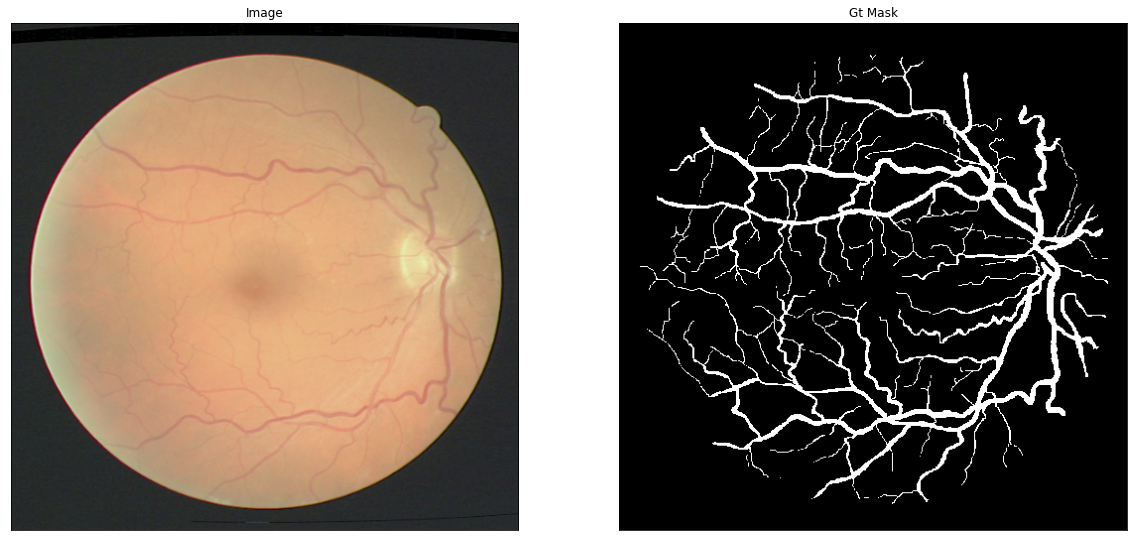

0 1
[0 1]


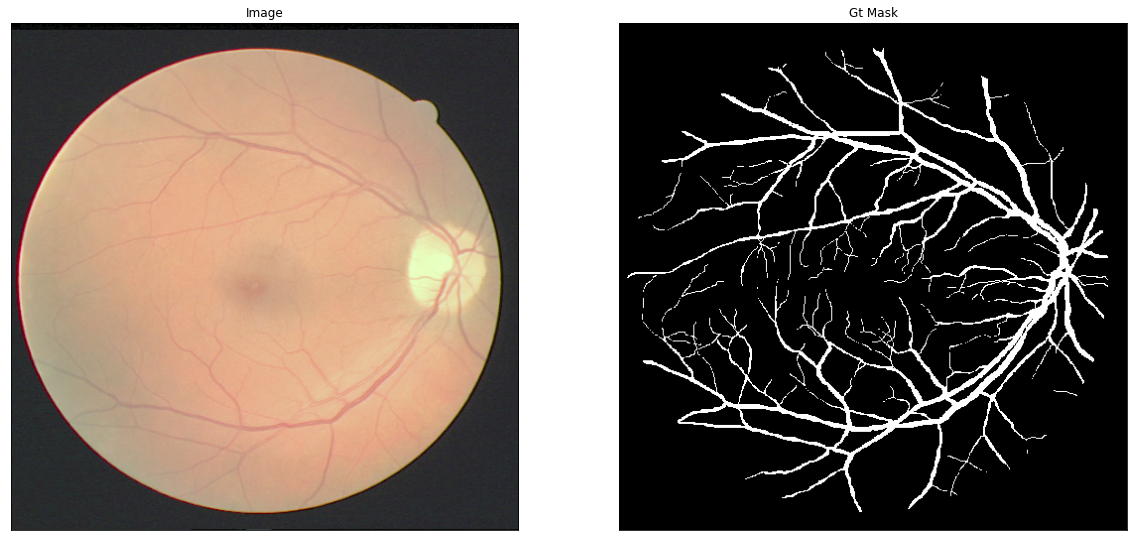

In [220]:
image, mask = next(iter(train_dataset.take(1))) 
print(image.shape, mask.shape)

for (img, msk) in zip(image[:2], mask[:2]):
    print(mask.numpy().min(), mask.numpy().max())
    print(np.unique(mask.numpy()))
    visualize(
        image=img.numpy(),
        gt_mask=msk.numpy(),
    )

# Model

In [246]:
from tensorflow import keras 

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()
#improvement 1
BACKBONE   = 'resnet50'
n_classes  = 1 
activation = 'sigmoid' 
model8 = sm.Unet(BACKBONE, classes=n_classes, activation=activation)
model8.summary(line_length=110)

Model: "model_1"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
data (InputLayer)                   [(None, None, None, 3)] 0                                                 
______________________________________________________________________________________________________________
bn_data (BatchNormalization)        (None, None, None, 3)   9            data[0][0]                           
______________________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)      (None, None, None, 3)   0            bn_data[0][0]                        
______________________________________________________________________________________________________________
conv0 (Conv2D)                      (None, None, None, 64)  9408         zero_padding2d[0][0]  

# Callback : Monitoring Training Progress

In [252]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, dataset, epoch_interval=5):
        self.dataset = dataset
        self.epoch_interval = epoch_interval
    
    def display(self, display_list, extra_title=''):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']

        if len(display_list) > len(title):
            title.append(extra_title)

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i], cmap='gray')
            plt.axis('off')
        plt.show()
        
    def create_mask(self, pred_mask):
        pred_mask = (pred_mask > 0.5).astype("int32")
        return pred_mask[0]
    
    def show_predictions(self, dataset, num=1):
        for image, mask in dataset.take(num):
            pred_mask = model8.predict(image)
            self.display([image[0], mask[0], self.create_mask(pred_mask)])
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch and epoch % self.epoch_interval == 0:
            self.show_predictions(self.dataset)
            print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [253]:
import os

# Define the directory to save the model
save_directory = '/kaggle/Models/'  # Change this to your desired directory

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)




In [254]:
# Define a callback to save the best model weights
checkpoint_callback = ModelCheckpoint(
    os.path.join(save_directory, "model8.h5"), monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# Define a callback for early stopping
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

# Define your DisplayCallback with the dataset and interval
display_callback = DisplayCallback(dataset=validation_dataset, epoch_interval=5)

# Compile and Fit

Epoch 1/250
14/14 [==============================] - 11s 459ms/step - loss: 0.1210 - dice_coefficient: 0.5801 - accuracy: 0.9645 - val_loss: 0.3078 - val_dice_coefficient: 0.0569 - val_accuracy: 0.9162

Epoch 00001: val_loss did not improve from 0.28862
Epoch 2/250
14/14 [==============================] - 5s 385ms/step - loss: 0.1227 - dice_coefficient: 0.5794 - accuracy: 0.9624 - val_loss: 0.3178 - val_dice_coefficient: 0.0538 - val_accuracy: 0.9129

Epoch 00002: val_loss did not improve from 0.28862
Epoch 3/250
14/14 [==============================] - 6s 386ms/step - loss: 0.1173 - dice_coefficient: 0.5940 - accuracy: 0.9639 - val_loss: 0.3172 - val_dice_coefficient: 0.0517 - val_accuracy: 0.9147

Epoch 00003: val_loss did not improve from 0.28862
Epoch 4/250
14/14 [==============================] - 5s 388ms/step - loss: 0.1133 - dice_coefficient: 0.6043 - accuracy: 0.9646 - val_loss: 0.3215 - val_dice_coefficient: 0.0520 - val_accuracy: 0.9122

Epoch 00004: val_loss did not improve 

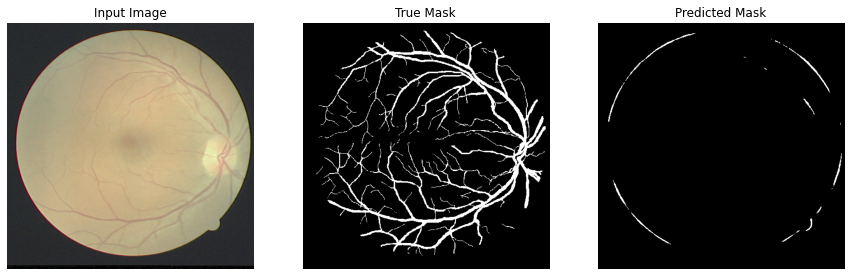


Sample Prediction after epoch 6

Epoch 7/250
14/14 [==============================] - 5s 385ms/step - loss: 0.1111 - dice_coefficient: 0.6152 - accuracy: 0.9636 - val_loss: 0.3303 - val_dice_coefficient: 0.0480 - val_accuracy: 0.9128

Epoch 00007: val_loss did not improve from 0.28862
Epoch 8/250
14/14 [==============================] - 5s 387ms/step - loss: 0.1075 - dice_coefficient: 0.6263 - accuracy: 0.9644 - val_loss: 0.3330 - val_dice_coefficient: 0.0454 - val_accuracy: 0.9134

Epoch 00008: val_loss did not improve from 0.28862
Epoch 9/250
14/14 [==============================] - 5s 388ms/step - loss: 0.1036 - dice_coefficient: 0.6363 - accuracy: 0.9657 - val_loss: 0.3272 - val_dice_coefficient: 0.0561 - val_accuracy: 0.9096

Epoch 00009: val_loss did not improve from 0.28862
Epoch 10/250
14/14 [==============================] - 5s 386ms/step - loss: 0.1010 - dice_coefficient: 0.6459 - accuracy: 0.9659 - val_loss: 0.3208 - val_dice_coefficient: 0.0634 - val_accuracy: 0.9109

Epoc

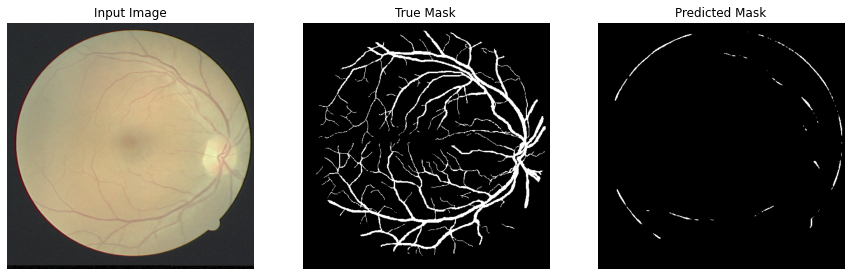


Sample Prediction after epoch 11

Epoch 12/250
14/14 [==============================] - 5s 387ms/step - loss: 0.1009 - dice_coefficient: 0.6529 - accuracy: 0.9651 - val_loss: 0.3322 - val_dice_coefficient: 0.0645 - val_accuracy: 0.9115

Epoch 00012: val_loss did not improve from 0.28862
Epoch 13/250
14/14 [==============================] - 6s 388ms/step - loss: 0.0981 - dice_coefficient: 0.6578 - accuracy: 0.9660 - val_loss: 0.3021 - val_dice_coefficient: 0.1248 - val_accuracy: 0.9098

Epoch 00013: val_loss did not improve from 0.28862
Epoch 14/250
14/14 [==============================] - 6s 389ms/step - loss: 0.0950 - dice_coefficient: 0.6671 - accuracy: 0.9670 - val_loss: 0.3388 - val_dice_coefficient: 0.0686 - val_accuracy: 0.9132

Epoch 00014: val_loss did not improve from 0.28862
Epoch 15/250
14/14 [==============================] - 5s 385ms/step - loss: 0.0925 - dice_coefficient: 0.6740 - accuracy: 0.9676 - val_loss: 0.3283 - val_dice_coefficient: 0.0877 - val_accuracy: 0.9113



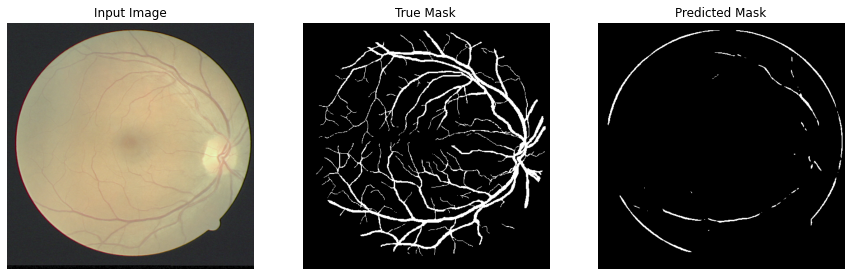


Sample Prediction after epoch 16

Epoch 17/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0881 - dice_coefficient: 0.6882 - accuracy: 0.9687 - val_loss: 0.3292 - val_dice_coefficient: 0.0920 - val_accuracy: 0.9128

Epoch 00017: val_loss did not improve from 0.28862
Epoch 18/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0875 - dice_coefficient: 0.6925 - accuracy: 0.9685 - val_loss: 0.2982 - val_dice_coefficient: 0.1640 - val_accuracy: 0.9158

Epoch 00018: val_loss did not improve from 0.28862
Epoch 19/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0857 - dice_coefficient: 0.6984 - accuracy: 0.9691 - val_loss: 0.2907 - val_dice_coefficient: 0.1928 - val_accuracy: 0.9136

Epoch 00019: val_loss did not improve from 0.28862
Epoch 20/250
14/14 [==============================] - 5s 388ms/step - loss: 0.0846 - dice_coefficient: 0.7011 - accuracy: 0.9694 - val_loss: 0.3309 - val_dice_coefficient: 0.1204 - val_accuracy: 0.9157



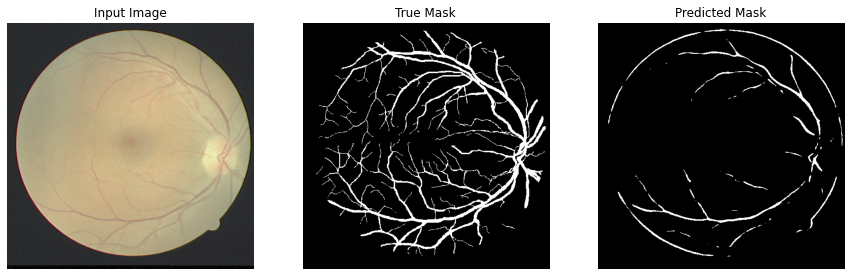


Sample Prediction after epoch 21

Epoch 22/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0803 - dice_coefficient: 0.7141 - accuracy: 0.9708 - val_loss: 0.2473 - val_dice_coefficient: 0.2637 - val_accuracy: 0.9209

Epoch 00022: val_loss improved from 0.27606 to 0.24730, saving model to /kaggle/Models/model8.h5
Epoch 23/250
14/14 [==============================] - 5s 385ms/step - loss: 0.0782 - dice_coefficient: 0.7202 - accuracy: 0.9714 - val_loss: 0.2916 - val_dice_coefficient: 0.2253 - val_accuracy: 0.9232

Epoch 00023: val_loss did not improve from 0.24730
Epoch 24/250
14/14 [==============================] - 6s 387ms/step - loss: 0.0767 - dice_coefficient: 0.7250 - accuracy: 0.9719 - val_loss: 0.2891 - val_dice_coefficient: 0.2281 - val_accuracy: 0.9200

Epoch 00024: val_loss did not improve from 0.24730
Epoch 25/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0758 - dice_coefficient: 0.7299 - accuracy: 0.9721 - val_loss: 0.2539 - val_dic

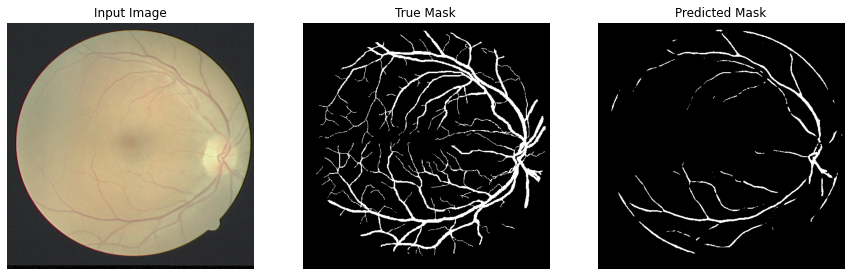


Sample Prediction after epoch 26

Epoch 27/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0734 - dice_coefficient: 0.7366 - accuracy: 0.9728 - val_loss: 0.2460 - val_dice_coefficient: 0.3169 - val_accuracy: 0.9279

Epoch 00027: val_loss did not improve from 0.24068
Epoch 28/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0718 - dice_coefficient: 0.7431 - accuracy: 0.9733 - val_loss: 0.2231 - val_dice_coefficient: 0.3574 - val_accuracy: 0.9295

Epoch 00028: val_loss improved from 0.24068 to 0.22307, saving model to /kaggle/Models/model8.h5
Epoch 29/250
14/14 [==============================] - 6s 389ms/step - loss: 0.0717 - dice_coefficient: 0.7446 - accuracy: 0.9731 - val_loss: 0.2054 - val_dice_coefficient: 0.3987 - val_accuracy: 0.9338

Epoch 00029: val_loss improved from 0.22307 to 0.20540, saving model to /kaggle/Models/model8.h5
Epoch 30/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0718 - dice_coefficient: 0.7442 -

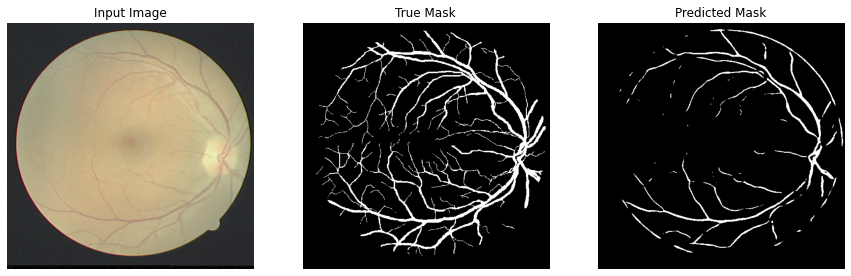


Sample Prediction after epoch 31

Epoch 32/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0756 - dice_coefficient: 0.7370 - accuracy: 0.9708 - val_loss: 0.1901 - val_dice_coefficient: 0.4657 - val_accuracy: 0.9376

Epoch 00032: val_loss improved from 0.20540 to 0.19008, saving model to /kaggle/Models/model8.h5
Epoch 33/250
14/14 [==============================] - 5s 388ms/step - loss: 0.0795 - dice_coefficient: 0.7299 - accuracy: 0.9690 - val_loss: 0.1907 - val_dice_coefficient: 0.4969 - val_accuracy: 0.9416

Epoch 00033: val_loss did not improve from 0.19008
Epoch 34/250
14/14 [==============================] - 5s 385ms/step - loss: 0.0752 - dice_coefficient: 0.7371 - accuracy: 0.9709 - val_loss: 0.1799 - val_dice_coefficient: 0.5029 - val_accuracy: 0.9421

Epoch 00034: val_loss improved from 0.19008 to 0.17987, saving model to /kaggle/Models/model8.h5
Epoch 35/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0713 - dice_coefficient: 0.7466 -

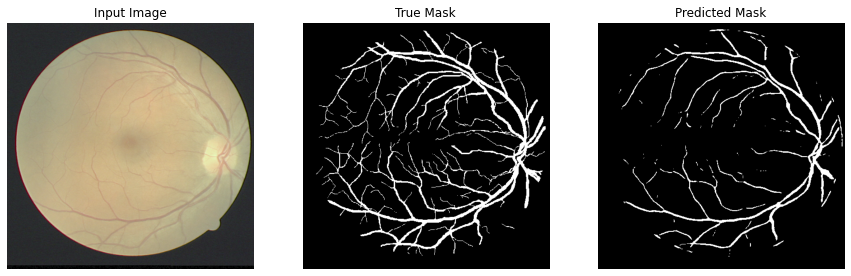


Sample Prediction after epoch 36

Epoch 37/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0656 - dice_coefficient: 0.7620 - accuracy: 0.9748 - val_loss: 0.1706 - val_dice_coefficient: 0.5291 - val_accuracy: 0.9443

Epoch 00037: val_loss did not improve from 0.16127
Epoch 38/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0644 - dice_coefficient: 0.7664 - accuracy: 0.9752 - val_loss: 0.1592 - val_dice_coefficient: 0.5566 - val_accuracy: 0.9483

Epoch 00038: val_loss improved from 0.16127 to 0.15921, saving model to /kaggle/Models/model8.h5
Epoch 39/250
14/14 [==============================] - 6s 390ms/step - loss: 0.0630 - dice_coefficient: 0.7708 - accuracy: 0.9758 - val_loss: 0.1489 - val_dice_coefficient: 0.5739 - val_accuracy: 0.9517

Epoch 00039: val_loss improved from 0.15921 to 0.14886, saving model to /kaggle/Models/model8.h5
Epoch 40/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0629 - dice_coefficient: 0.7727 -

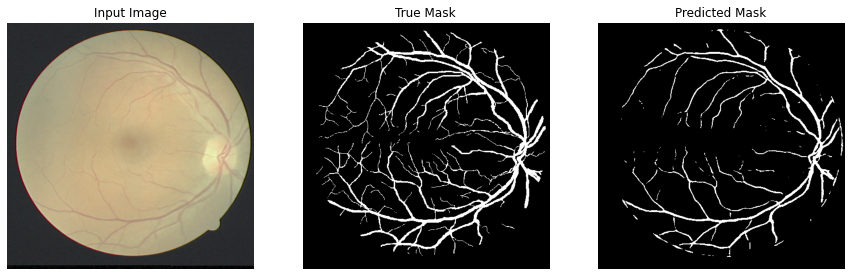


Sample Prediction after epoch 41

Epoch 42/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0630 - dice_coefficient: 0.7738 - accuracy: 0.9753 - val_loss: 0.1400 - val_dice_coefficient: 0.6110 - val_accuracy: 0.9546

Epoch 00042: val_loss improved from 0.14089 to 0.13995, saving model to /kaggle/Models/model8.h5
Epoch 43/250
14/14 [==============================] - 5s 388ms/step - loss: 0.0625 - dice_coefficient: 0.7745 - accuracy: 0.9754 - val_loss: 0.1276 - val_dice_coefficient: 0.6384 - val_accuracy: 0.9573

Epoch 00043: val_loss improved from 0.13995 to 0.12756, saving model to /kaggle/Models/model8.h5
Epoch 44/250
14/14 [==============================] - 6s 389ms/step - loss: 0.0618 - dice_coefficient: 0.7778 - accuracy: 0.9757 - val_loss: 0.1318 - val_dice_coefficient: 0.6329 - val_accuracy: 0.9566

Epoch 00044: val_loss did not improve from 0.12756
Epoch 45/250
14/14 [==============================] - 6s 387ms/step - loss: 0.0608 - dice_coefficient: 0.7814 -

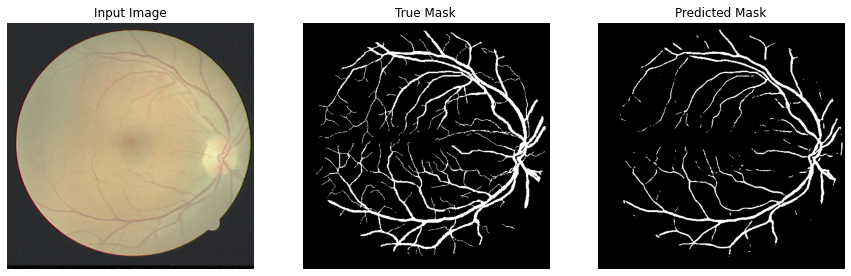


Sample Prediction after epoch 46

Epoch 47/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0599 - dice_coefficient: 0.7839 - accuracy: 0.9762 - val_loss: 0.1244 - val_dice_coefficient: 0.6579 - val_accuracy: 0.9588

Epoch 00047: val_loss did not improve from 0.12385
Epoch 48/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0611 - dice_coefficient: 0.7820 - accuracy: 0.9756 - val_loss: 0.1158 - val_dice_coefficient: 0.6817 - val_accuracy: 0.9612

Epoch 00048: val_loss improved from 0.12385 to 0.11579, saving model to /kaggle/Models/model8.h5
Epoch 49/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0618 - dice_coefficient: 0.7812 - accuracy: 0.9751 - val_loss: 0.1159 - val_dice_coefficient: 0.6712 - val_accuracy: 0.9607

Epoch 00049: val_loss did not improve from 0.11579
Epoch 50/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0611 - dice_coefficient: 0.7818 - accuracy: 0.9755 - val_loss: 0.1192 - val_dic

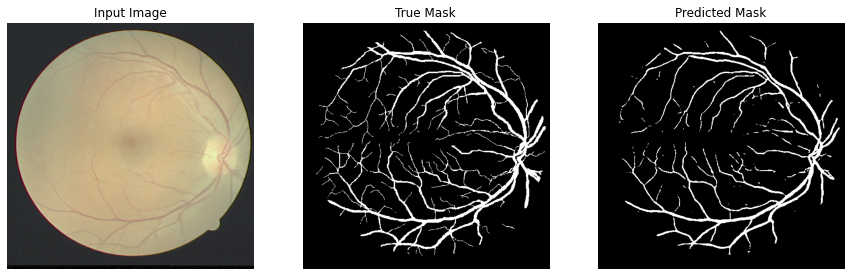


Sample Prediction after epoch 51

Epoch 52/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0584 - dice_coefficient: 0.7894 - accuracy: 0.9767 - val_loss: 0.1147 - val_dice_coefficient: 0.6878 - val_accuracy: 0.9615

Epoch 00052: val_loss did not improve from 0.11133
Epoch 53/250
14/14 [==============================] - 5s 388ms/step - loss: 0.0565 - dice_coefficient: 0.7930 - accuracy: 0.9775 - val_loss: 0.1148 - val_dice_coefficient: 0.6881 - val_accuracy: 0.9614

Epoch 00053: val_loss did not improve from 0.11133
Epoch 54/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0554 - dice_coefficient: 0.7975 - accuracy: 0.9779 - val_loss: 0.1154 - val_dice_coefficient: 0.6856 - val_accuracy: 0.9615

Epoch 00054: val_loss did not improve from 0.11133
Epoch 55/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0542 - dice_coefficient: 0.8009 - accuracy: 0.9784 - val_loss: 0.1120 - val_dice_coefficient: 0.6973 - val_accuracy: 0.9623



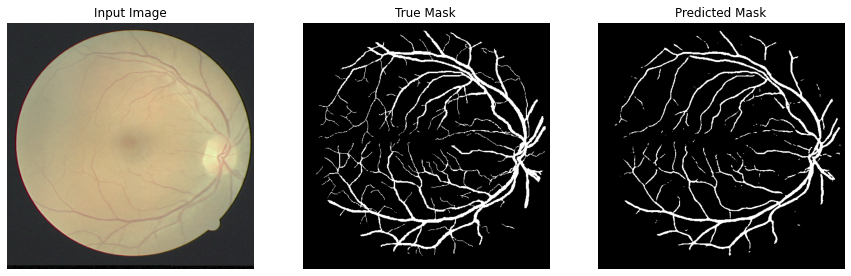


Sample Prediction after epoch 56

Epoch 57/250
14/14 [==============================] - 5s 385ms/step - loss: 0.0537 - dice_coefficient: 0.8035 - accuracy: 0.9785 - val_loss: 0.1109 - val_dice_coefficient: 0.6976 - val_accuracy: 0.9622

Epoch 00057: val_loss improved from 0.11133 to 0.11088, saving model to /kaggle/Models/model8.h5
Epoch 58/250
14/14 [==============================] - 5s 385ms/step - loss: 0.0550 - dice_coefficient: 0.8007 - accuracy: 0.9777 - val_loss: 0.1099 - val_dice_coefficient: 0.7114 - val_accuracy: 0.9628

Epoch 00058: val_loss improved from 0.11088 to 0.10987, saving model to /kaggle/Models/model8.h5
Epoch 59/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0544 - dice_coefficient: 0.8027 - accuracy: 0.9780 - val_loss: 0.1152 - val_dice_coefficient: 0.7015 - val_accuracy: 0.9619

Epoch 00059: val_loss did not improve from 0.10987
Epoch 60/250
14/14 [==============================] - 6s 391ms/step - loss: 0.0545 - dice_coefficient: 0.8038 -

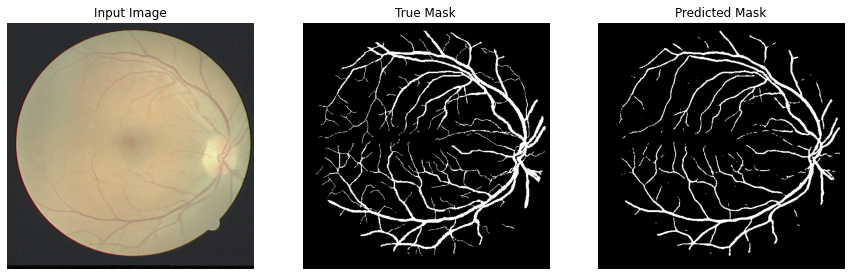


Sample Prediction after epoch 61

Epoch 62/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0530 - dice_coefficient: 0.8075 - accuracy: 0.9785 - val_loss: 0.1104 - val_dice_coefficient: 0.7108 - val_accuracy: 0.9629

Epoch 00062: val_loss did not improve from 0.10987
Epoch 63/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0518 - dice_coefficient: 0.8104 - accuracy: 0.9790 - val_loss: 0.1106 - val_dice_coefficient: 0.7105 - val_accuracy: 0.9627

Epoch 00063: val_loss did not improve from 0.10987
Epoch 64/250
14/14 [==============================] - 6s 388ms/step - loss: 0.0516 - dice_coefficient: 0.8112 - accuracy: 0.9791 - val_loss: 0.1102 - val_dice_coefficient: 0.7151 - val_accuracy: 0.9626

Epoch 00064: val_loss did not improve from 0.10987
Epoch 65/250
14/14 [==============================] - 5s 385ms/step - loss: 0.0513 - dice_coefficient: 0.8127 - accuracy: 0.9792 - val_loss: 0.1113 - val_dice_coefficient: 0.7131 - val_accuracy: 0.9628



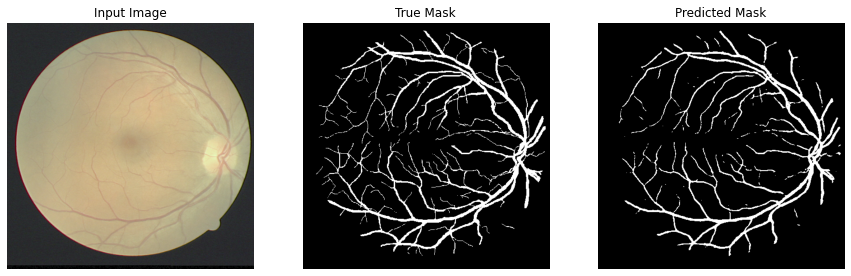


Sample Prediction after epoch 66

Epoch 67/250
14/14 [==============================] - 5s 387ms/step - loss: 0.0503 - dice_coefficient: 0.8158 - accuracy: 0.9795 - val_loss: 0.1124 - val_dice_coefficient: 0.7171 - val_accuracy: 0.9627

Epoch 00067: val_loss did not improve from 0.10987
Epoch 68/250
14/14 [==============================] - 5s 386ms/step - loss: 0.0492 - dice_coefficient: 0.8191 - accuracy: 0.9800 - val_loss: 0.1138 - val_dice_coefficient: 0.7142 - val_accuracy: 0.9625

Epoch 00068: val_loss did not improve from 0.10987
Epoch 00068: early stopping


In [256]:
from tensorflow.keras.metrics import MeanIoU

# Define a function to calculate the Dice coefficient
def dice_coefficient(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + 1e-5) / (union + 1e-5)
#################################################################

# define optomizer
optim = keras.optimizers.Adam(0.0001)
bce   = keras.losses.BinaryCrossentropy()
metrics = [dice_coefficient, "accuracy"]

# compile keras model with defined optimozer, loss and metrics
model8.compile(optim, bce, metrics)



history = model8.fit(
    train_dataset,
    epochs=250,
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback, early_stopping_callback, display_callback]
)

In [257]:
test_data = '/kaggle/input/dataset/new_data/new_data/test/image'
test_images = sorted(
    [
        os.path.join(test_data, fname)
        for fname in os.listdir(test_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

test_images

['/kaggle/input/dataset/new_data/new_data/test/image/01_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/02_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/03_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/04_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/05_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/06_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/07_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/08_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/09_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/10_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/11_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/12_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/13_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/14_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/15_test.t

In [258]:
test_mask = '/kaggle/input/dataset/new_data/new_data/test/mask'
test_masks = sorted(
    [
        os.path.join(test_mask, fname)
        for fname in os.listdir(test_mask)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
test_masks

['/kaggle/input/dataset/new_data/new_data/test/mask/01_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/02_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/03_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/04_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/05_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/06_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/07_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/08_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/09_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/10_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/11_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/12_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/13_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/14_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/15_test.gif',
 '/kaggle/

In [259]:
print("Number of samples:", len(test_images), len(test_masks))
for test_path, mask_path in zip(test_images[:10], test_masks[:10]):
    print(test_path[-31:], "|", mask_path[-34:])

Number of samples: 20 20
new_data/test/image/01_test.tif | ata/new_data/test/mask/01_test.gif
new_data/test/image/02_test.tif | ata/new_data/test/mask/02_test.gif
new_data/test/image/03_test.tif | ata/new_data/test/mask/03_test.gif
new_data/test/image/04_test.tif | ata/new_data/test/mask/04_test.gif
new_data/test/image/05_test.tif | ata/new_data/test/mask/05_test.gif
new_data/test/image/06_test.tif | ata/new_data/test/mask/06_test.gif
new_data/test/image/07_test.tif | ata/new_data/test/mask/07_test.gif
new_data/test/image/08_test.tif | ata/new_data/test/mask/08_test.gif
new_data/test/image/09_test.tif | ata/new_data/test/mask/09_test.gif
new_data/test/image/10_test.tif | ata/new_data/test/mask/10_test.gif


In [260]:
IMAGE_SIZE = 512
BATCH_SIZE = 8

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset

test_dataset = data_generator(test_images, test_masks)
test_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [261]:
valid_dataset = test_dataset

In [262]:
test_masks = np.concatenate([y for x, y in valid_dataset], axis=0)
masks = test_masks.ravel()

In [263]:
test_imgs = np.concatenate([x for x, y in valid_dataset], axis=0)
predictions = model8.predict(test_imgs)
predictions.shape

(20, 512, 512, 1)

In [264]:
y_pred = predictions.ravel()
y_pred = (y_pred > 0.5).astype('int32')
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [265]:
from sklearn.metrics import classification_report
print(classification_report(masks, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98   4784655
           1       0.83      0.72      0.77    458225

    accuracy                           0.96   5242880
   macro avg       0.90      0.85      0.88   5242880
weighted avg       0.96      0.96      0.96   5242880



In [266]:
def jaccard(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
print('The Jaccard Score is: ', jaccard(y_pred, masks))


The Jaccard Score is:  0.6282336322435735


In [269]:
def my_dice(target, prediction):
 intersection = np.logical_and(target, prediction)
 union = np.logical_or(target, prediction)
 dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection))
 return dice
print('The Dice Score is: ', my_dice(y_pred, masks))

The Dice Score is:  0.7716750468763118


In [268]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(masks, y_pred)
print('The MCC Score is:', mcc)


The MCC Score is: 0.7535499923742294


In [270]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming 'masks' and 'y_pred' are the true labels and predicted probabilities for the positive class.
fpr, tpr, thresholds = roc_curve(masks, y_pred)
auc = roc_auc_score(masks, y_pred)

print('The AUC Score is:', auc)


The AUC Score is: 0.8538960459895114


(-0.5, 511.5, 511.5, -0.5)

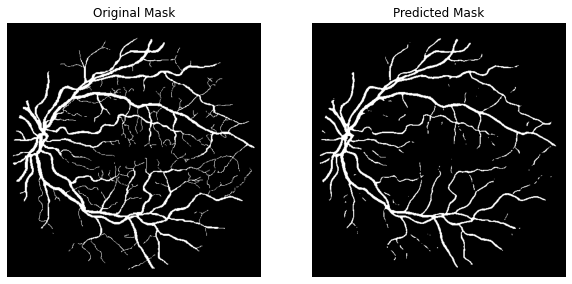

In [274]:
image = test_imgs[4]
mask = test_masks[4]
image = np.expand_dims(image, axis=0)
pred_mask = model8.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

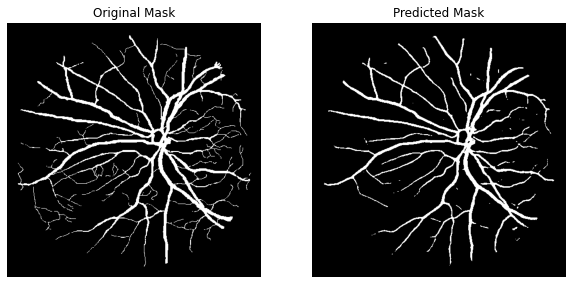

In [273]:
image = test_imgs[3]
mask = test_masks[3]
image = np.expand_dims(image, axis=0)
pred_mask = model8.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

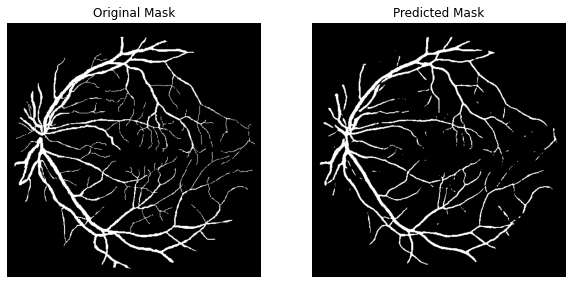

In [272]:
image = test_imgs[11]
mask = test_masks[11]
image = np.expand_dims(image, axis=0)
pred_mask = model8.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

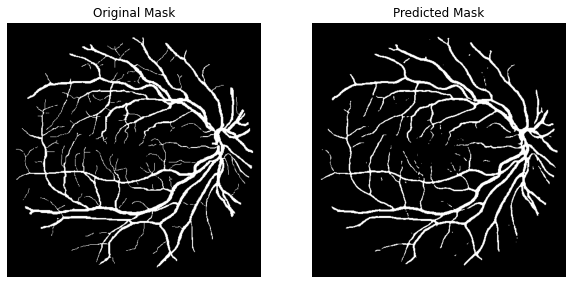

In [271]:
image = test_imgs[1]
mask = test_masks[1]
image = np.expand_dims(image, axis=0)
pred_mask = model8.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')